In [1]:
import ase
import numpy as np
from numpy.linalg import norm, svd
from ase.visualize import view
import struct_statistics as stats
import matplotlib.pyplot as p
import soaputils as su
#%matplotlib

In [2]:
# generate and read the two structures used in this notebook
struct_ran = su.gen_struct(70, seed=50)
struct_opt = ase.io.read('res_structs/x0_test/batch0.cfg')

In [ ]:
# calculate SOAP-parameters and matrices, only works on linux systems, 
# so the matrices were pre-calculated can be loaded in the cell below
import soaplite
import genBasis
rCut = 10.0
NradBas = 5
Lmax = 5
myAlphas, myBetas = genBasis.getBasisFunc(rCut, NradBas)

at_ran = soaplite.get_periodic_soap_structure(struct_ran, myAlphas, myBetas, rCut, NradBas, Lmax)
mat_opt = soaplite.get_periodic_soap_structure(struct_opt, myAlphas, myBetas, rCut, NradBas, Lmax)
np.save("res_data/mat_ran",mat_ran)
np.save("res_data/mat_opt",mat_opt)

In [3]:
# load matrices from storage
mat_ran = np.load("res_data/mat_ran.npy")
mat_opt = np.load("res_data/mat_opt.npy")

In [4]:
# show random structure
view(struct_ran)

In [5]:
# show optimised structure
view(struct_opt)

Text(0, 0.5, '$i(\\mathbf{r})$')

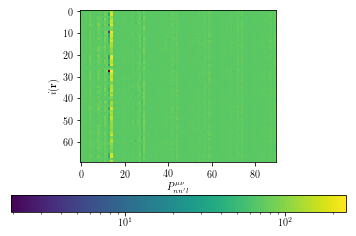

In [18]:
import matplotlib.colors as colors
colors.LogNorm()
vmax=180
vmin=-70
p.rc('text', usetex=True)
#p.imshow(mat_ran)
p.imshow(mat_ran-vmin,norm=colors.LogNorm())
p.colorbar(orientation='horizontal')
p.xlabel(r"$\displaystyle P_{nn'l}^{\mu \nu}$")
p.ylabel(r"$i(\mathbf{r})$")

Text(0, 0.5, '$i(\\mathbf{r})$')

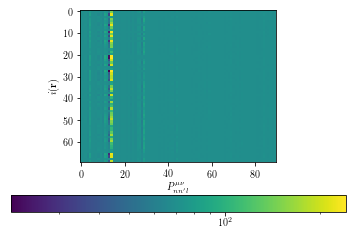

In [19]:
p.rc('text', usetex=True)
#p.imshow(mat_opt)
p.imshow(mat_opt-vmin,norm=colors.LogNorm())
p.colorbar(orientation='horizontal')
p.xlabel(r"$\displaystyle P_{nn'l}^{\mu \nu}$")
p.ylabel(r"$i(\mathbf{r})$")

In [15]:
np.amin(mat_ran)

-68.07060360904575

In [63]:
p.subplot(121)
p.imshow(mat_ran)
p.subplot(122)
p.imshow(mat_opt)

#p.subplots_adjust(bottom=0.1, right=1.1, top=0.9)
#cax = p.axes([0.85, 0.1, 0.075, 0.8])
p.colorbar(fraction=0.05)
p.show()

In [74]:
fig, axs = p.subplots(1, 2, figsize=(9, 3), sharey=True)
axs[0].imshow(mat_ran)
axs[1].imshow(mat_opt)
fig.colorbar(axs[0].imshow(mat_opt), ax=axs, orientation='horizontal', fraction=.15)

In [14]:
# show SVD plots
s_ran = svd(mat_ran.transpose(), full_matrices=False, compute_uv=False)
s_opt = svd(mat_opt.transpose(), full_matrices=False, compute_uv=False)

p.semilogy(s_ran)
p.semilogy(s_opt)
p.xlabel('$i$')
p.ylabel('Singular value $\sigma_i$')
p.legend(['random structure','optimised structure'])

